<a href="https://colab.research.google.com/github/Rizki-132/Allmateri/blob/main/Klasifikasi_program_pkh_(Fix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import graphviz

#Library SVM
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Library Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#Library C4.5
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image


#K-fold Cross Validation
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

warnings.filterwarnings('ignore')

#Import Dataset

Jobs
1 = Buruh
2 = Petani
3 = Guru
4 = ibu rumah tangga
5 = pedagang
6 = sopir
7 = PNS
8 = Pengangguran
9 = Dokter
10 = Satpam

gender
1 = Laki - laki
2 = Perempuan

Status
1 = Belum Menikah
2 = Sudah Menikah
3 = Janda
4 = Duda


In [3]:
df = pd.read_csv('/content/pkh_data_program_PKH_157121.csv')
df

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
0,MEMED,22,Majalengka,5,6005708,2,2,2,2,4,0
1,MURSIH,38,Majalengka,6,5391497,2,2,3,3,3,0
2,CARWADI,63,Majalengka,1,2596236,2,1,0,2,2,0
3,ABUBAKAR S,64,Majalengka,5,2843187,1,1,0,0,2,0
4,CATU,40,Majalengka,4,5302633,1,0,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
157116,HANAN,63,Majalengka,5,5957162,2,1,1,3,4,0
157117,PARTA,23,Majalengka,1,3841623,2,3,0,1,3,0
157118,YANAH,33,Majalengka,6,6849597,2,1,0,1,3,0
157119,TIMU,57,Majalengka,6,5987539,2,0,3,0,4,0


#Data Understanding

In [4]:
print("data shape", df.shape)

data shape (157121, 11)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157121 entries, 0 to 157120
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   nama                   157121 non-null  object
 1   umur                   157121 non-null  int64 
 2   tempat lahir           157121 non-null  object
 3   jenis pekerjaan        157121 non-null  int64 
 4   jumlah penghasilan     157121 non-null  int64 
 5   jenis kelamin          157121 non-null  int64 
 6   jumlah keluarga (SD)   157121 non-null  int64 
 7   jumlah keluarga (SMP)  157121 non-null  int64 
 8   jumlah keluarga (SMA)  157121 non-null  int64 
 9   status perkawinan      157121 non-null  int64 
 10  penerima PKH           157121 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 13.2+ MB


In [6]:
df.describe()

,umur,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
count,157121.000000,157121.000000,1.571210e+05,157121.000000,157121.000000,157121.000000,157121.000000,157121.000000,157121.000000
mean,41.437529,5.509225,3.499417e+06,1.498412,1.494231,1.501531,1.499087,2.500411,0.089969
std,13.863706,2.865212,2.019948e+06,0.499999,1.117889,1.119240,1.118182,1.117756,0.286138
min,18.000000,1.000000,1.100000e+01,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,29.000000,3.000000,1.754967e+06,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,41.000000,6.000000,3.495535e+06,1.000000,1.000000,2.000000,1.000000,3.000000,0.000000
75%,53.000000,8.000000,5.243831e+06,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
max,65.000000,10.000000,6.999997e+06,2.000000,3.000000,3.000000,3.000000,4.000000,1.000000


In [7]:
df['penerima PKH'].value_counts()


,count
penerima PKH,
0,142985
1,14136


#Cleaning Data

In [8]:
df.isnull().sum()

,0
nama,0
umur,0
tempat lahir,0
jenis pekerjaan,0
jumlah penghasilan,0
jenis kelamin,0
jumlah keluarga (SD),0
jumlah keluarga (SMP),0
jumlah keluarga (SMA),0
status perkawinan,0


In [9]:
#mencari duplikasi
df.duplicated().sum()

0

#Exploratory Data Analysisi(EDA)

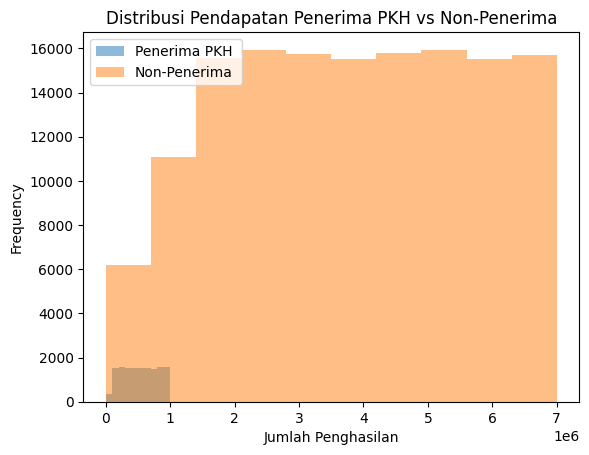

In [10]:
# Distribusi Pendapatan Penerima PKH vs Non-Penerima



plt.hist(df[df['penerima PKH'] == 1]['jumlah penghasilan'], alpha=0.5, label='Penerima PKH ')
plt.hist(df[df['penerima PKH'] == 0]['jumlah penghasilan'], alpha=0.5, label='Non-Penerima')
plt.xlabel('Jumlah Penghasilan')
plt.ylabel('Frequency')
plt.title('Distribusi Pendapatan Penerima PKH vs Non-Penerima')
_ = plt.legend()

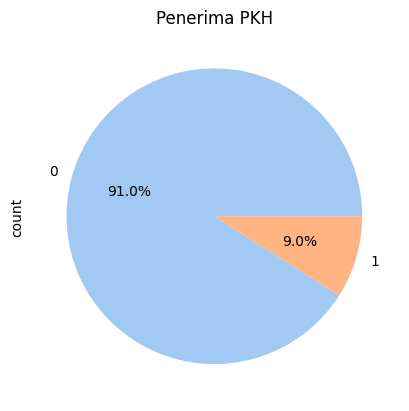

In [11]:
sns.set_palette('pastel')
df['penerima PKH'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Penerima PKH')
plt.show()

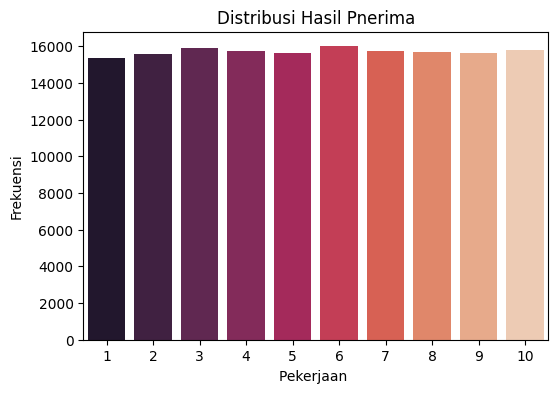

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='jenis pekerjaan', palette='rocket')

plt.title('Distribusi Hasil Pnerima')
plt.xlabel('Pekerjaan ')
plt.ylabel('Frekuensi')
plt.show()

In [13]:
df = df.drop(columns=['nama','tempat lahir'])
df.corr()

,umur,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan,penerima PKH
umur,1.000000,0.001607,-0.000053,-0.003455,0.001421,0.001358,-0.002288,-0.000666,0.001783
jenis pekerjaan,0.001607,1.000000,-0.005518,0.003079,-0.001557,-0.000563,-0.004217,-0.002639,-0.000314
jumlah penghasilan,-0.000053,-0.005518,1.000000,-0.000358,-0.000892,-0.003991,-0.000241,-0.002771,-0.460828
jenis kelamin,-0.003455,0.003079,-0.000358,1.000000,-0.005007,0.001713,-0.000671,0.000175,-0.001092
jumlah keluarga (SD),0.001421,-0.001557,-0.000892,-0.005007,1.000000,0.004737,-0.000800,-0.000488,-0.008465
jumlah keluarga (SMP),0.001358,-0.000563,-0.003991,0.001713,0.004737,1.000000,0.004528,0.003806,-0.004544
jumlah keluarga (SMA),-0.002288,-0.004217,-0.000241,-0.000671,-0.000800,0.004528,1.000000,-0.002137,-0.005910
status perkawinan,-0.000666,-0.002639,-0.002771,0.000175,-0.000488,0.003806,-0.002137,1.000000,-0.000135
penerima PKH,0.001783,-0.000314,-0.460828,-0.001092,-0.008465,-0.004544,-0.005910,-0.000135,1.000000


#Preparation Data

In [14]:
x = df.drop(columns=['penerima PKH'])
y = df['penerima PKH']

print("X : ", x.shape)
print("y : ", y.shape)

X :  (157121, 8)
y :  (157121,)


In [15]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Modeling dan Evaluasi

In [17]:
#Model Support Vector Machine
clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)
print(classification_report(y_test, y_pred))
print("Akurasi model SVM : {:.2f}%".format(CLF_acc*100))

[[27343  1207]
 [  955  1920]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     28550
           1       0.61      0.67      0.64      2875

    accuracy                           0.93     31425
   macro avg       0.79      0.81      0.80     31425
weighted avg       0.93      0.93      0.93     31425

Akurasi model SVM : 93.12%


#Perbandingan

Naive Bayes

In [18]:
# Inisialisasi model Naive Bayes
model = GaussianNB()

# Melatih model dengan data pelatihan
model.fit(x_train, y_train)

# Membuat prediksi pada data uji
y_pred = model.predict(x_test)

# Menghitung Akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung Confusion Matrix
conf_matrix_naive = confusion_matrix(y_test, y_pred)

# Menghasilkan Classification Report
class_report_n = classification_report(y_test, y_pred)

# Mencetak hasil
print(conf_matrix_naive)
print(class_report_n)
print(f"Akurasi model Naive Bayes: {accuracy * 100:.2f}%")

[[27309  1241]
 [  423  2452]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     28550
           1       0.66      0.85      0.75      2875

    accuracy                           0.95     31425
   macro avg       0.82      0.90      0.86     31425
weighted avg       0.96      0.95      0.95     31425

Akurasi model Naive Bayes: 94.70%


Model C4.5

In [19]:
model_c45 = DecisionTreeClassifier(criterion='entropy')
model_c45.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
y_pred = model_c45.predict(x_test)
accuracy_c4 = accuracy_score(y_test, y_pred)
conf_matrix_c4 = confusion_matrix(y_test, y_pred)
class_report_c = classification_report(y_test, y_pred)

print(conf_matrix_c4)
print(class_report_c)
print(f"Akurasi Model: {accuracy_c4 * 100:.2f}%")

[[28542     8]
 [    4  2871]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28550
           1       1.00      1.00      1.00      2875

    accuracy                           1.00     31425
   macro avg       1.00      1.00      1.00     31425
weighted avg       1.00      1.00      1.00     31425

Akurasi Model: 99.96%


K-Fold Cross Validation

In [22]:
k = 5
kf = KFold(n_splits=k)

# Menyimpan hasil evaluasi
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Proses k-fold cross validation
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Melatih model
    clf = SVC(kernel='linear')
    clf.fit(X_train, y_train)

    # Memprediksi
    y_pred = clf.predict(X_test)

    # Evaluasi
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1_scores.append(f1_score(y_test, y_pred, average='macro'))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    accuracy_k = accuracy_score(y_test, y_pred)
    class_report_k = classification_report(y_test, y_pred)


# Menghitung rata-rata hasil evaluasi
mean_accuracy = np.mean(accuracies)
mean_precision = np.mean(precisions)
mean_recall = np.mean(recalls)
mean_f1_score = np.mean(f1_scores)

# Menghitung confusion matrix keseluruhan dengan menjumlahkan setiap matrix fold
conf_matrix_sum = np.sum(conf_matrices, axis=0)

print("Rata-rata Akurasi: {:.2f}%".format(mean_accuracy * 100))
print("Rata-rata Precision: {:.2f}%".format(mean_precision * 100))
print("Rata-rata Recall: {:.2f}%".format(mean_recall * 100))
print("Rata-rata F1-Score: {:.2f}%".format(mean_f1_score * 100))
print("Confusion Matrix:\n", conf_matrix_sum)

print(class_report_k)
print(f"Akurasi Model: {accuracy_k * 100:.2f}%")

Rata-rata Akurasi: 93.10%
Rata-rata Precision: 78.63%
Rata-rata Recall: 81.32%
Rata-rata F1-Score: 79.89%
Confusion Matrix:
 [[136822   6163]
 [  4672   9464]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     28516
           1       0.61      0.66      0.64      2908

    accuracy                           0.93     31424
   macro avg       0.79      0.81      0.80     31424
weighted avg       0.93      0.93      0.93     31424

Akurasi Model: 93.00%


#Testing

Jobs
1 = Buruh
2 = Petani
3 = Guru
4 = ibu rumah tangga
5 = pedagang
6 = sopir
7 = PNS
8 = Pengangguran
9 = Dokter
10 = Satpam

gender
1 = Laki - laki
2 = Perempuan

Status
1 = Belum Menikah
2 = Sudah Menikah
3 = Janda
4 = Duda


In [23]:
new_data = {
            'nama' : ['Saripah','Santi',"oay", "Cici","caca","cucu"],
            'umur' : [59, 29, 30, 35, 45, 78],
            'tempat lahir' : ['Majalengka', 'Majalengka', "Majalengka","Majalengka","Majalengka","Majalengka"],
            'jenis pekerjaan' : [7, 10, 3, 2, 3, 7],
            'jumlah penghasilan' : [50000, 10000000, 3000000, 6000000,2000000, 40000],
            'jenis kelamin' : [2, 2, 1, 2, 2, 1],
            'jumlah keluarga (SD)' : [0, 0, 2, 4, 5, 1],
            'jumlah keluarga (SMP)' : [0, 0, 0, 3, 0, 0],
            'jumlah keluarga (SMA)' : [0, 0, 0, 1, 2, 3],
            'status perkawinan' : [3, 1, 1, 3, 2, 1]
             }
new_data = pd.DataFrame(new_data)
new_data

,nama,umur,tempat lahir,jenis pekerjaan,jumlah penghasilan,jenis kelamin,jumlah keluarga (SD),jumlah keluarga (SMP),jumlah keluarga (SMA),status perkawinan
0,Saripah,59,Majalengka,7,50000,2,0,0,0,3
1,Santi,29,Majalengka,10,10000000,2,0,0,0,1
2,oay,30,Majalengka,3,3000000,1,2,0,0,1
3,Cici,35,Majalengka,2,6000000,2,4,3,1,3
4,caca,45,Majalengka,3,2000000,2,5,0,2,2
5,cucu,78,Majalengka,7,40000,1,1,0,3,1


1 = Penerima PKH
0 = Tidak

In [24]:
# Asumsikan clf_svm adalah model SVM yang sudah dilatih
# Misalnya: clf_svm.fit(X_train_scaled, y_train)

# Prediksi menggunakan data numerik yang sudah di-scale
data_baru= new_data.drop(columns=['nama','tempat lahir'])

scaled_new_data = scaler.transform(data_baru)
y_pred_new = clf.predict(scaled_new_data)

print("Prediksi:", y_pred_new)

Prediksi: [1 0 0 0 0 1]
